<a href="https://colab.research.google.com/github/profahp/profahp/blob/main/SMA_MQP/MarkBuono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install sklego
    !pip install textblob
    !pip install jsonlines
    !pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=d00632557864cbfe79bd5352aad47487c70d8aa043816c3fd12b90b7fb380d8b
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter
import jsonlines

#Visualizations
import pyLDAvis
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim_models as gensimvis
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import seaborn as sns #visualisation library

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)


#Sentiment Analysis
from textblob import TextBlob

#Regression Analysis
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklego.meta import ZeroInflatedRegressor
import statsmodels.api as sm

#tweet downloads
import snscrape.modules.twitter as sntwitter


/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [ ]:
tweets_list=[]
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#mentalhealth since:2019-02-19 until:2019-02-26').get_items()):
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount,tweet.replyCount,tweet.retweetCount,tweet.quoteCount])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-26281d91171c>:3: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount,tweet.replyCount,tweet.retweetCount,tweet.quoteCount])


In [ ]:
df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'text', 'Username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count','public_metrics.quote_count'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # Read the contents of the JSONL file
# with open('November2022.jsonl', 'r') as jsonl_file:
#     json_list = [json.loads(line) for line in jsonl_file]

# # Write the contents to a new JSON file
# with open('output.json', 'w') as json_file:
#     json.dump(json_list, json_file)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# f = open('output.json', encoding="utf8")

# # returns JSON object as
# # a dictionary
# data = json.load(f)

# #flattens the nested json file
# df=pd.json_normalize(data)
# print(df.info)

# #put into a dataframe

# df = pd.DataFrame(df)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.EMOJI_DATA]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
df['emoji_free_tweets'] = df['text'].apply(call_emoji_free)

#Create a new column with url free tweets
df['url_free_tweets'] = df['emoji_free_tweets'].apply(url_free_text)
     


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load spacy
# Make sure to restart the runtime after running installations and libraries tab
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like','mentalhealth','mental','health','rt','#mentalhealth','#mental','#health']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(df['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Make tokens a string again
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['tokens_back_to_text'].apply(get_lemmas)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Make lemmas a string again
df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in df['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) 
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@', '', text) # Remove @
    tokens = re.sub('&', '', text) # Remove &
    tokens = re.sub('rt', '', text) # Remove rt
    tokens = re.sub('mentalhealth', '', text) # Remove mentalhealth
    tokens = re.sub('mental', '', text) # Remove mental
    tokens = re.sub('health', '', text) # Remove health
    tokens = re.sub('#mentalhealth', '', text) # Remove #mentalhealth
    tokens = re.sub('amp', '', text) # Remove amp
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE
    tokens = tokens.lower().split() # Make text lowercase and split it

    
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['lemmas_back_to_text'].apply(tokenize)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence \w
<>:19: DeprecationWarning: invalid escape sequence \w
<ipython-input-12-226f3e0c4a09>:19: DeprecationWarning: invalid escape sequence \w
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers


In [ ]:
# Create a id2word dictionary
id2word = Dictionary(df['lemma_tokens'])
print(len(id2word))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


39920


In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

15004


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=3, id2word=id2word, workers=20, passes=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
support life help wellness today work people mentalhealthawareness love mindfulness

------ Topic 1 ------
depression anxiety help new people issue life stress talk work

------ Topic 2 ------
depression day help anxiety mentalhealthawareness veteran need mentalillness survive read



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.137009734197118

Coherence Score:  0.3165610298298291


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
gensimvis.prepare(base_model, corpus, id2word)
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.033664 -0.081567       1        1  37.254222
0     -0.067653  0.065160       2        1  34.903985
2      0.101318  0.016407       3        1  27.841793, topic_info=                       Term         Freq        Total Category  logprob  \
1027                veteran   703.000000   703.000000  Default  30.0000   
49               depression  2780.000000  2780.000000  Default  29.0000   
783                 survive   487.000000   487.000000  Default  28.0000   
437                 anxiety  2178.000000  2178.000000  Default  27.0000   
112   mentalhealthawareness  1203.000000  1203.000000  Default  26.0000   
...                     ...          ...          ...      ...      ...   
132                  people   345.097957  1484.937364   Topic3  -5.4216   
197                 support   327.681542  1572.603621   Topic3  -5.4734   
42       mentalhealthmatter   291.640289   748.968038   Topic3  -5.5900   
60                    today   294.371601  1117.583378   Topic3  -5.5806   
223                    work   289.954243  1294.850212   Topic3  -5.5958   

      loglift  
1027  30.0000  
49    29.0000  
783   28.0000  
437   27.0000  
112   26.0000  
...       ...  
132   -0.1807  
197   -0.2898  
42     0.3355  
60    -0.0554  
223   -0.2178  

[280 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
1256       1  0.122065             20
1256       2  0.020840             20
1256       3  0.857432             20
12861      2  0.986878          22932
68         1  0.120490              4
...      ...       ...            ...
761        1  0.033805  youthwellness
761        2  0.980334  youthwellness
1044       1  0.003475              ⠀
1044       2  0.959031              ⠀
1044       3  0.038222              ⠀

[585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
#Get the sentiments for each tweet
sentiment=[]
for i in range(len(df)):
   sentiment.append(TextBlob(df.loc[i, "text"]).sentiment.polarity)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Get the subjectivity of each tweet
subjectivity=[]
for i in range(len(df)):
   subjectivity.append(TextBlob(df.loc[i, "text"]).sentiment.subjectivity)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["sentiment"]=sentiment
df["subjectivity"]=subjectivity


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentimenttotal=0.0
for i in range(len(df)):
   sentimenttotal+=df.loc[i,"sentiment"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
subjectivitytotal=0.0
for i in range(len(df)):
   subjectivitytotal+=df.loc[i,"subjectivity"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Tweets with zero engagement
count=0
for i in range(len(df)):
  if(df.loc[i,'public_metrics.reply_count']==0 & df.loc[i,'public_metrics.like_count']==0):
    count+=1
#total tweets
print(len(df))
# no engagement tweet
print(count)
#percent no engagement
print(count/len(df))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


22088
19536
0.8844621513944223


In [ ]:
sentimentavg= sentimenttotal/len(df)
subjectivityavg=subjectivitytotal/len(df)
print("sentiment avg:",sentimentavg)
print("subjectivity:",subjectivityavg)

sentiment avg: 0.14117299182261053
subjectivity: 0.37587902307791443


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
liketotal=0.0
for i in range(len(df)):
   liketotal+=df.loc[i,"public_metrics.like_count"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
replytotal=0.0
for i in range(len(df)):
   replytotal+=df.loc[i,"public_metrics.reply_count"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
retweettotal=0.0
for i in range(len(df)):
   retweettotal+=df.loc[i,"public_metrics.retweet_count"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
quotetotal=0.0
for i in range(len(df)):
   quotetotal+=df.loc[i,"public_metrics.quote_count"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
likeavg= liketotal/len(df)
replyavg=replytotal/len(df)
retweetavg=retweettotal/len(df)
quoteavg=quotetotal/len(df)
print("like avg:",likeavg)
print("reply avg:",replyavg)
print("retweet avg:",retweetavg)
print("quote avg:",quoteavg)

like avg: 3.212649402390438
reply avg: 0.23601050344078234
retweet avg: 1.2188971387178558
quote avg: 0.12789750090546903


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#remove outliers for likes
pd_series_likes = df['public_metrics.like_count']
pd_series_adjusted = pd_series_likes[pd_series_likes.between(pd_series_likes.quantile(.01), pd_series_likes.quantile(.99))]
df['public_metrics.like_count_no_outliers']=pd_series_adjusted

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#remove outliers for replies
pd_series_reply = df['public_metrics.reply_count']
pd_series_adjusted = pd_series_reply[pd_series_reply.between(pd_series_reply.quantile(.01), pd_series_likes.quantile(.99))]
df['public_metrics.reply_count_no_outliers']=pd_series_adjusted

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='sentiment'>

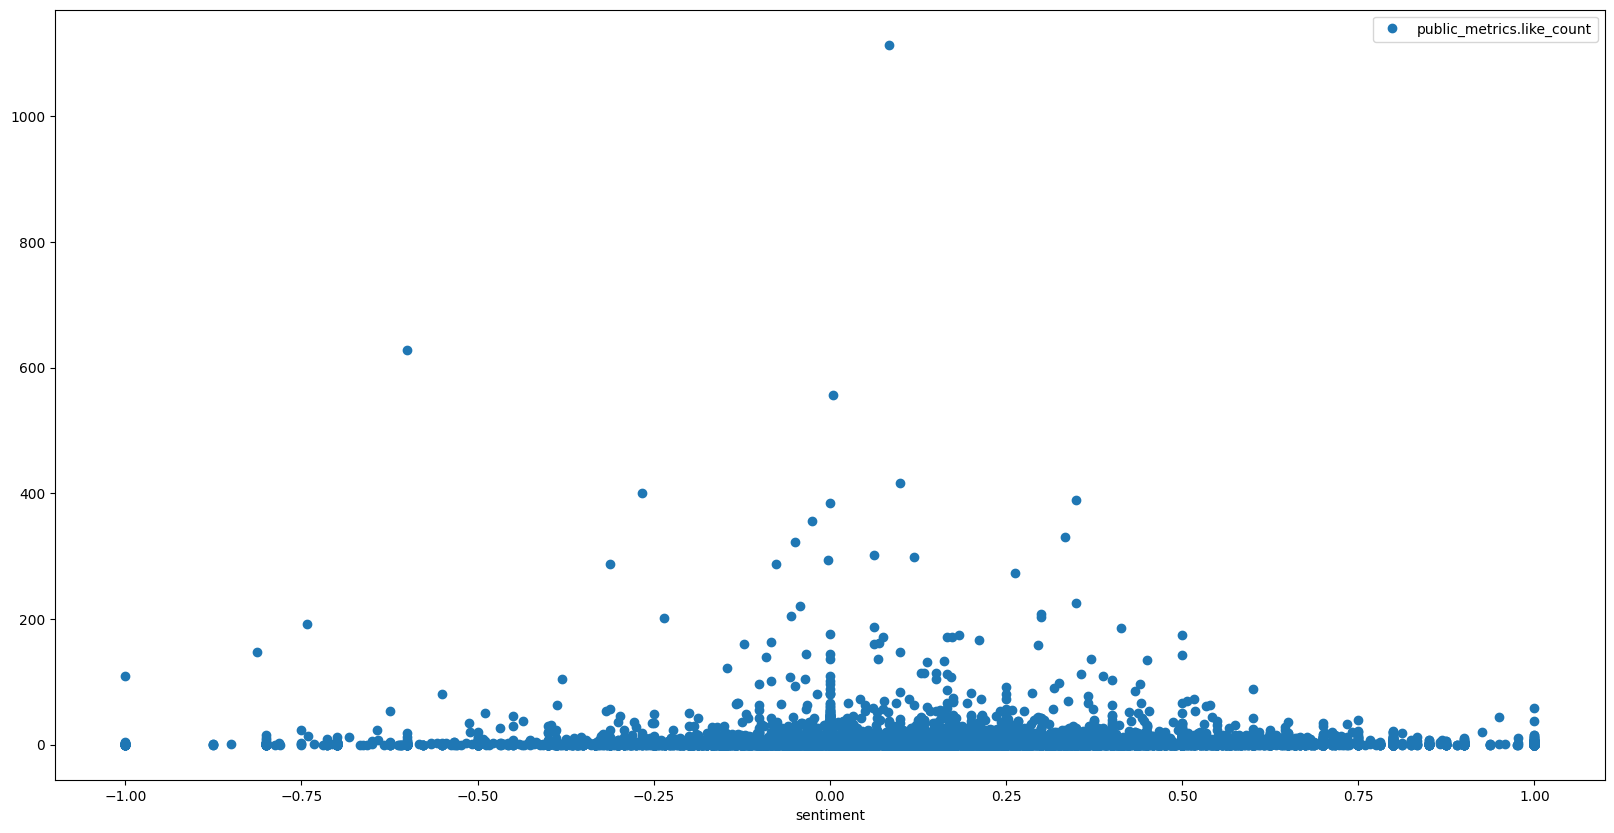

In [ ]:
df.plot(x='sentiment', y='public_metrics.like_count',style='o',figsize=(20,10))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='sentiment'>

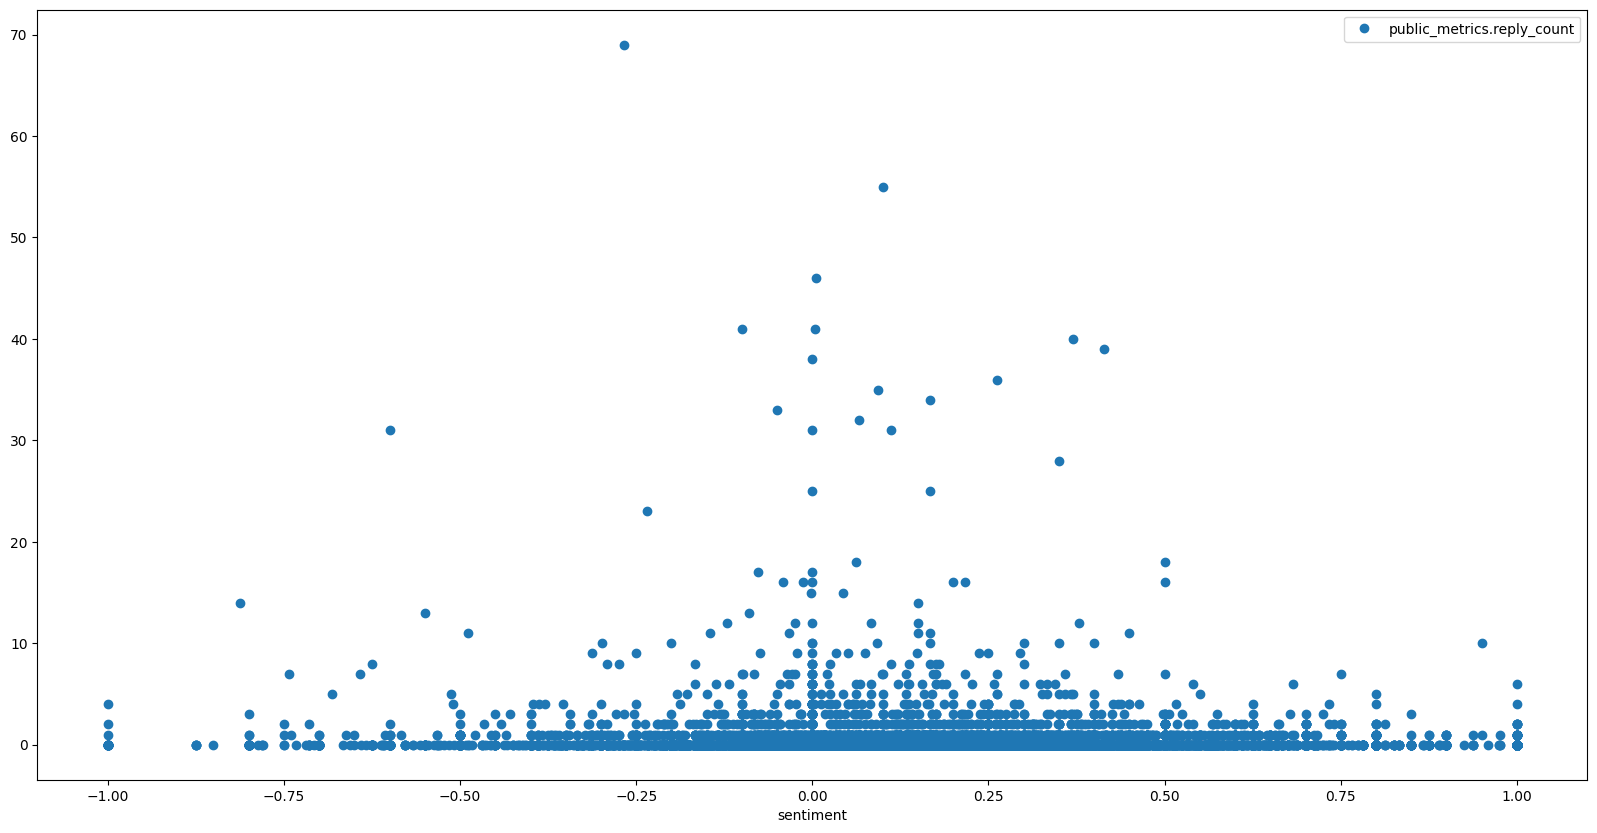

In [ ]:
df.plot(x='sentiment', y='public_metrics.reply_count',style='o',figsize=(20,10))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='sentiment'>

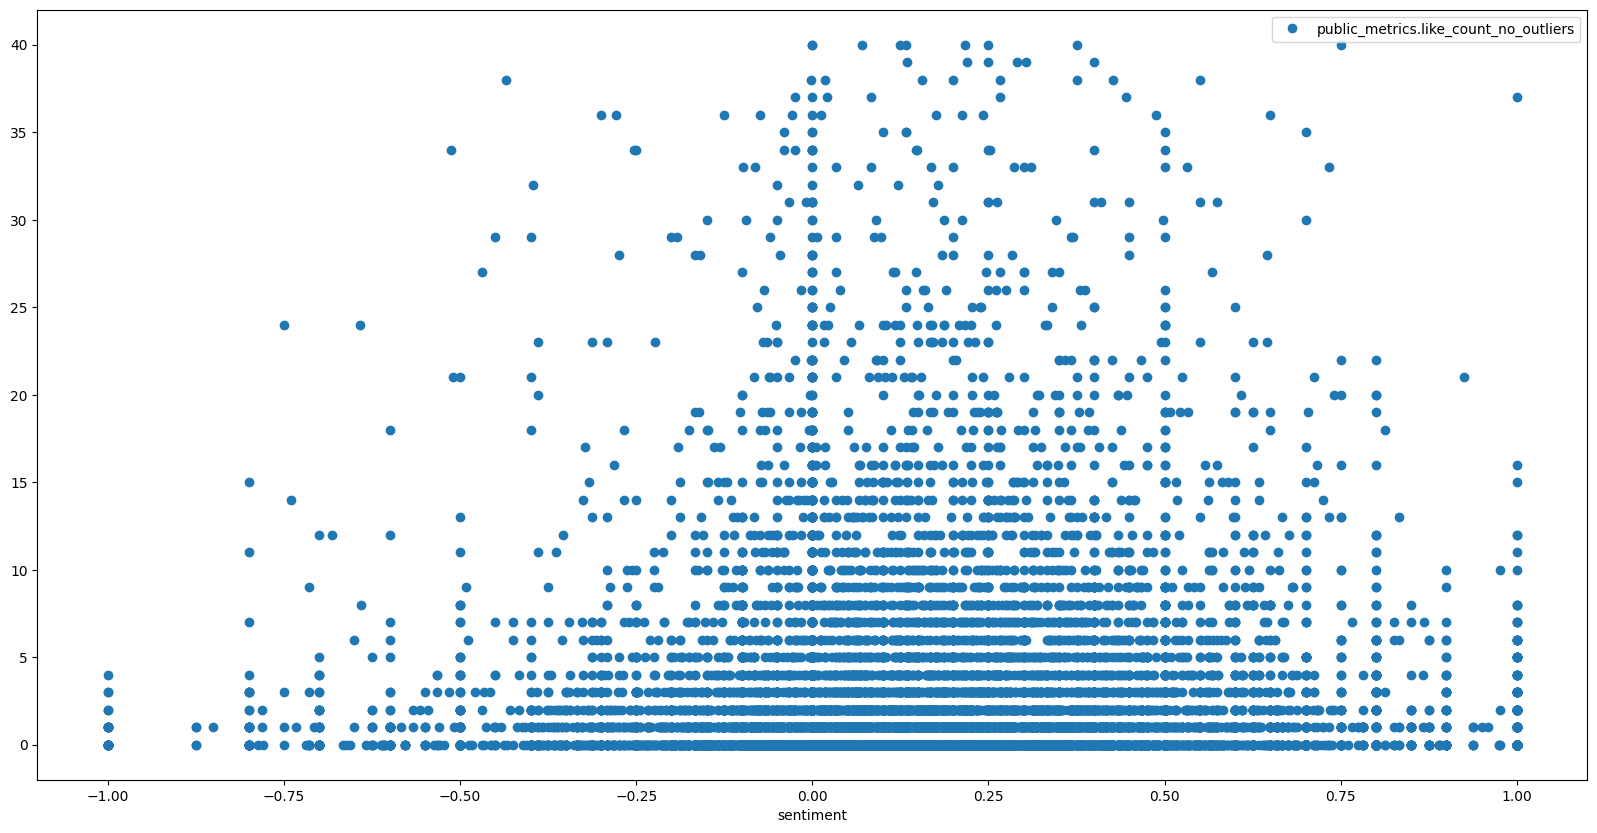

In [ ]:
df.plot(x='sentiment', y='public_metrics.like_count_no_outliers',style='o',figsize=(20,10))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='sentiment'>

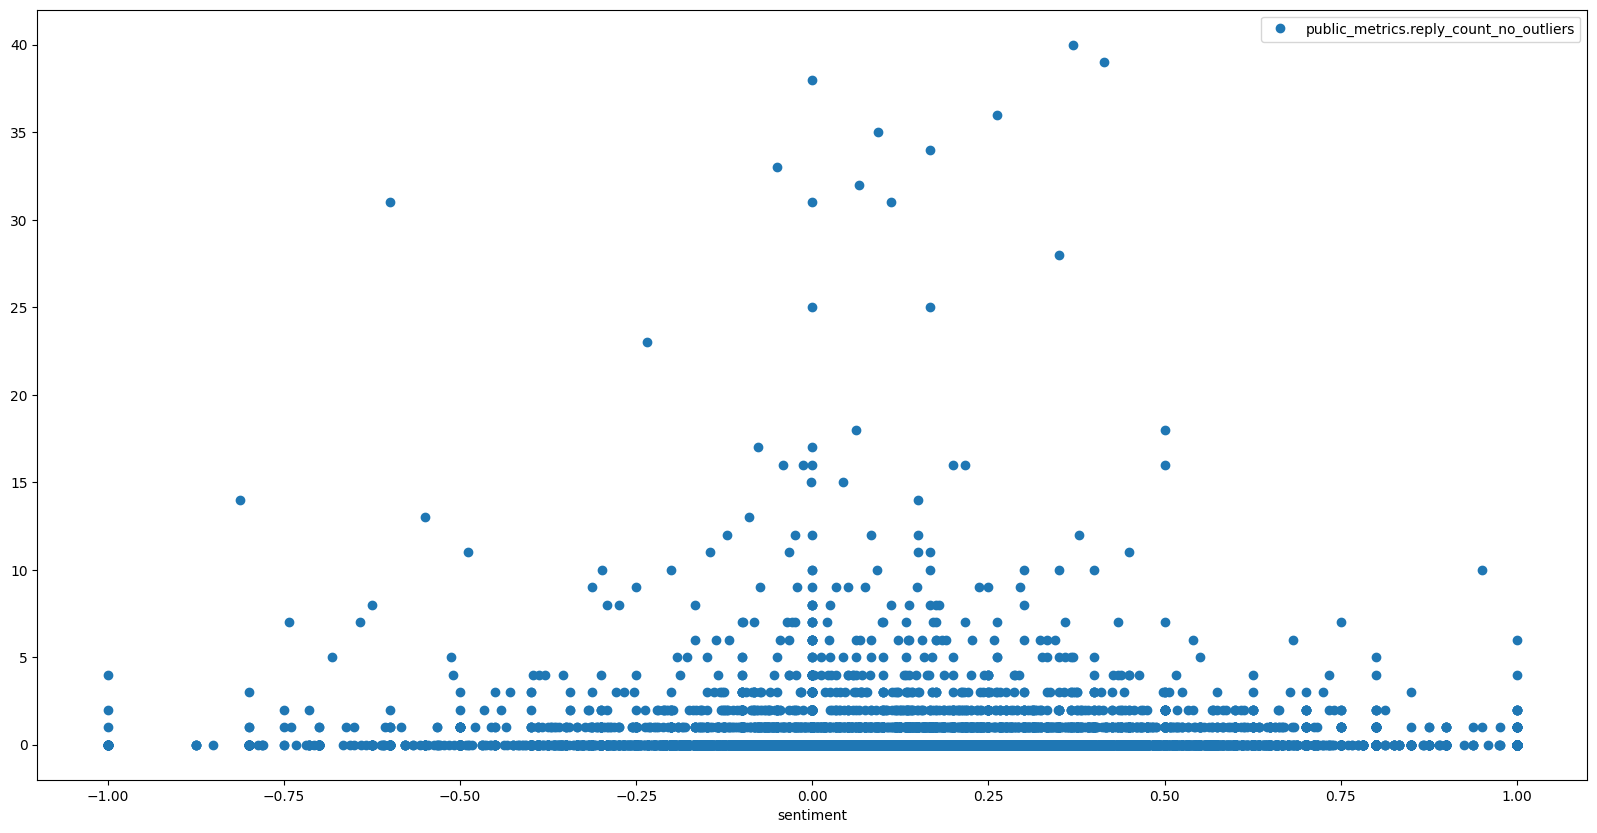

In [ ]:
df.plot(x='sentiment', y='public_metrics.reply_count_no_outliers',style='o',figsize=(20,10))

In [ ]:
#most liked tweet
print(df[['public_metrics.like_count']].idxmax())
print(df[['public_metrics.like_count']].max())

df.iloc[9195].text

public_metrics.like_count    9132
dtype: int64
public_metrics.like_count    1114
dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Our lovely support worker Caroline is running a gentle stretching group with patients this afternoon 🧘\u200d♀️ #yoga #relaxation #mentalhealth https://t.co/zN5hLzgbpl'

In [ ]:
#most retweeted tweet
print(df[['public_metrics.retweet_count']].idxmax())
print(df[['public_metrics.retweet_count']].max())

df.iloc[0].text

public_metrics.retweet_count    17242
dtype: int64
public_metrics.retweet_count    515
dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'@WolfBlitzer #QuestionsForBernie:  If you were President and a bill came to your desk requiring schools to offer optional #MentalHealth screenings to Jr and Sr High School Students (Grades 5-12), would you sign it?'

In [ ]:
#number of posts with positive sentiment
print((df["sentiment"]>0).sum())
#percent
print((df["sentiment"]>0).sum()/len(df))

11939
0.5405197392249185


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#number of posts with neutral sentiment
print((df["sentiment"]==0).sum())
#percent
print((df["sentiment"]==0).sum()/len(df))

6319
0.2860829409634191


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#number of posts with negative sentiment
print((df["sentiment"]<0).sum())
#percent
print((df["sentiment"]<0).sum()/len(df))

3830
0.17339731981166245


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#all of the hashtags

df["hashtags"]=df.text.str.lower().str.findall(r'#.*?(?=\s|$)')
print(df["hashtags"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                    [#questionsforbernie:, #mentalhealth]
1                   [#facebook⁩, #suicide,, #mentalhealth]
2                    [#mentalhealth, #mentalhealthmatters]
3                  [#depression, #mentalhealth, #selfcare]
4                              [#mentalhealth, #bepatient]
                               ...                        
22083                       [#heartdisease, #mentalhealth]
22084                       [#savesqaishey, #mentalhealth]
22085    [#depression, #cardib, #mentalhealth, #postpar...
22086    [#bipolar, #memoir, #mentalhealth, #writer, #s...
22087    [#lifelessons, #mentalhealth, #resilience, #se...
Name: hashtags, Length: 22088, dtype: object


In [ ]:
#method to create a hashtag dictionary
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
a=to_1D(df["hashtags"]).value_counts().to_string()[:3000]
print(a)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#mentalhealth                                                21263
#depression                                                   2064
#anxiety                                                      1615
#mentalhealthawareness                                        1272
#health                                                        978
#wellbeing                                                     842
#mentalillness                                                 796
#mentalhealthmatters                                           790
#psychology                                                    706
#selfcare                                                      661
#wellness                                                      623
#suicideprevention                                             588
#love                                                          551
#suicide                                                       544
#ptsd                                                         

In [ ]:
sentimentone=[]
for i in range(len(df)):
   sentimentone.append((df.loc[i, "sentiment"])+1)

In [ ]:
df["sentimentone"]=sentimentone

In [ ]:
y = df['sentimentone']
X = df[['public_metrics.like_count','public_metrics.reply_count']]

# create the zero-inflated negative binomial regression model
model = sm.ZeroInflatedNegativeBinomialP(y, X).fit()

# print the model summary
print(model.summary())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:3121: RuntimeWarning: invalid value encountered in subtract
  llf = (gammaln(y + a1) - gammaln(y + 1) - gammaln(a1) +
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:3227: RuntimeWarning: invalid value encountered in subtract
  pgpart = polygamma(1, a3) - polygamma(1, a1)
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:3238: RuntimeWarning: invalid value encountered in multiply
  a4**2 * pgpart) +
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:3251: RuntimeWarning: invalid

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fat

KeyboardInterrupt: ignored

In [ ]:
#variance calculations

In [ ]:
df["sentiment"].var()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.07276298517119263

In [ ]:
df["public_metrics.like_count"].var()

In [ ]:
df['public_metrics.like_count_no_outliers'].var()

In [ ]:
df["public_metrics.reply_count"].var()